In [2]:
from IPython.display import Image
import torch
from torch import tensor
import torch.nn
import numpy
from torch import nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
import random

In [19]:
input_size = 10
hidden_sizes = [128, 64]
output_size = 784
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.ReLU()
                     )
def test_show(output):
    output = output.detach().reshape((28, 28))

    plt.imshow(output.detach().numpy());

In [29]:
parse_model = torch.load('my_mnist_model.pt')

/Users/itachi/miniconda3/lib/python3.9/site-packages/torch/nn/modules/container.py:117: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


tensor([0.0841, 0.0947, 0.1097, 0.0915, 0.1042, 0.1023, 0.1077, 0.1027, 0.0961,
        0.1070], grad_fn=<SoftmaxBackward>)

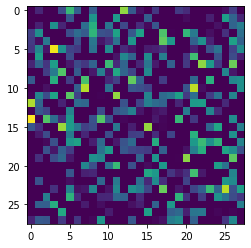

In [30]:
tst = model(torch.rand(10))
test_show(tst)
# print(nn.Softmin()(tst))
test_show(tst)
parse_model(torch.rand(28 * 28))

In [34]:
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
softmax = nn.Softmax()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for i in range(10):
        test_input = torch.zeros(10)
        num = random.randint(0, 9)
        test_input[num] = 1
        # Training pass
        optimizer.zero_grad()
        
        # output = what we predict data will look like
        outputs = model(test_input)
        
        # labels = data we learn on <=> TRUTH
        labels = parse_model(outputs)
        print(labels, num, test_input)
        generator_loss = loss(labels, tensor([num]))
        # print(labels, num)
        
        generator_loss.backward()
        optimizer.step()
        #This is where the model learns by backpropagating
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += generator_loss.item()
    else:
        print("Epoch {}, for random set of {}, loss is {}".format(e, test_input, running_loss / 1000))
        test_show(outputs)
print("\nTraining Time (in minutes) =",(time()-time0)/60)

tensor([0.0873, 0.0961, 0.1138, 0.0963, 0.0996, 0.1102, 0.1081, 0.0916, 0.0983,
        0.0985], grad_fn=<SoftmaxBackward>) 3 tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])


IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)